# DIY人脸识别服务

## 人脸识别工作流程
![](image/face_recognition.png)

## 安装人脸识别包face_recognition

In [1]:
! pip3 install face_recognition

## 导入模块

In [38]:
import face_recognition

## 公共函数－绘制

In [39]:
import matplotlib.pyplot as plt

from PIL import Image
from PIL import ImageDraw


"""显示所有的测试图片"""
def show_images(imgs):
    plt.figure(figsize=(20, 6))

    for i, img in enumerate(imgs):
        plt.subplot(1, len(imgs), i+1)
        plt.imshow(img)

    plt.show()

"""
绘制矩形框
　　rect (top, right, bottom, left)
"""
def draw_rectangle(draw, rect, outline='yellow', width=5):
    top_left = (rect[1], rect[0])
    bottom_right = (rect[3], rect[2])
    top_right = (rect[3], rect[0])
    bottom_left= (rect[1], rect[2])

    draw.line([top_left, top_right], fill=outline, width=width)
    draw.line([top_right, bottom_right], fill=outline, width=width)
    draw.line([bottom_right, bottom_left], fill=outline, width=width)
    draw.line([bottom_left, top_left], fill=outline, width=width)

## 加载显示图片

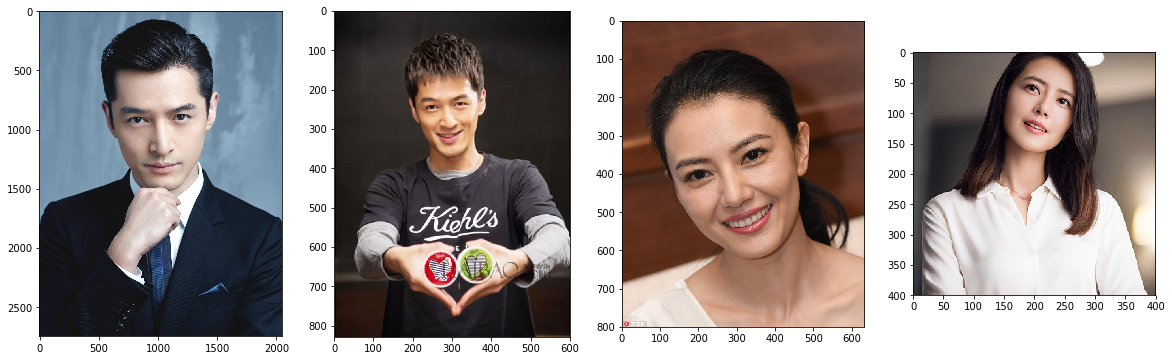

In [40]:
hu_ge1 = 'image/hu_ge1.jpg'
hu_ge2 = 'image/hu_ge2.jpg'
gao_yuan_yuan1 = 'image/gao_yuan_yuan1.jpg'
gao_yuan_yuan2 = 'image/gao_yuan_yuan2.jpg'

img_hu_ge1 = face_recognition.load_image_file(hu_ge1)
img_hu_ge2 = face_recognition.load_image_file(hu_ge2)
img_gao_yuan_yuan1 = face_recognition.load_image_file(gao_yuan_yuan1)
img_gao_yuan_yuan2 = face_recognition.load_image_file(gao_yuan_yuan2)

img_files = [hu_ge1, hu_ge2, gao_yuan_yuan1, gao_yuan_yuan2]
imgs = [img_hu_ge1, img_hu_ge2, img_gao_yuan_yuan1, img_gao_yuan_yuan2]

show_images(imgs)

## 人脸检测

### 人脸定位 face_locations
Help on function face_locations in module face_recognition.api:

face_locations(img, number_of_times_to_upsample=1, model='hog')
    Returns an array of bounding boxes of human faces in a image

    :param img: An image (as a numpy array)
    :param number_of_times_to_upsample: How many times to upsample the image looking for faces. Higher numbers find smaller faces.
    :param model: Which face detection model to use. "hog" is less accurate but faster on CPUs. "cnn" is a more accurate
                  deep-learning model which is GPU/CUDA accelerated (if available). The default is "hog".
    :return: A list of tuples of found face locations in css (top, right, bottom, left) order

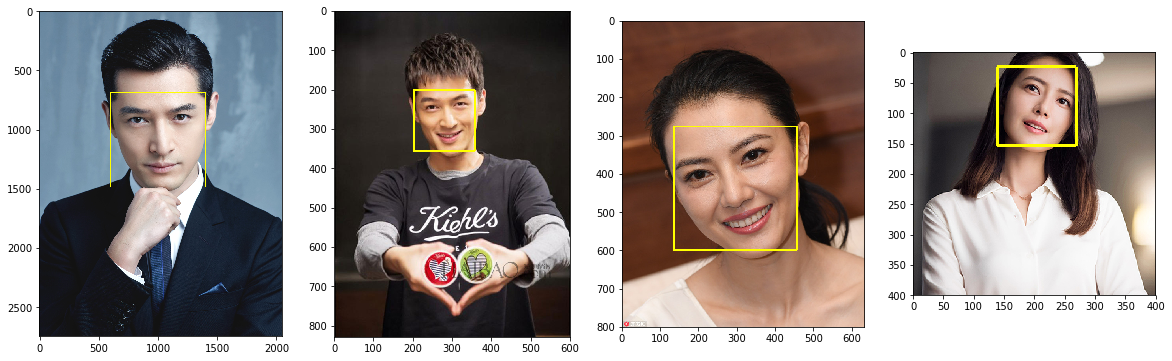

In [41]:
def draw_face_rectangle(img_files):
    images = []
    face_locations = []
    for img_file in img_files:
        img = face_recognition.load_image_file(img_file)
        image = Image.open(img_file)
        draw = ImageDraw.Draw(image)

        locations = face_recognition.face_locations(img)
        for location in locations:
            draw_rectangle(draw, location)

        images.append(image)
        face_locations.append(location)

    return images

images = draw_face_rectangle(img_files)
show_images(images)

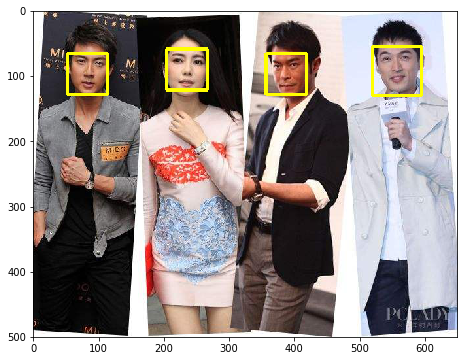

In [42]:
images = draw_face_rectangle([multiple_people])
show_images(images)

## 公共函数－numpy array与base64互转

In [7]:
import base64
import numpy as np


def nparray_to_base64(nparray):
    """np.array 转 base64字符串"""

    if nparray is None or not nparray.all():
        return None

    return base64.b64encode(nparray).decode()


def base64_to_nparray(base64_str):
    """base64字符串 转 np.array"""

    if not base64_str:
        return None

    return np.fromstring(base64.b64decode(base64_str))

## 人脸特征编码

### 人脸编码 face_encodings
Help on function face_encodings in module face_recognition.api:

face_encodings(face_image, known_face_locations=None, num_jitters=1)
    Given an image, return the 128-dimension face encoding for each face in the image.

    :param face_image: The image that contains one or more faces
    :param known_face_locations: Optional - the bounding boxes of each face if you already know them.
    :param num_jitters: How many times to re-sample the face when calculating encoding. Higher is more accurate, but slower (i.e. 100 is 100x slower)
    :return: A list of 128-dimensional face encodings (one for each face in the image)

In [16]:
face_encodings = face_recognition.face_encodings(img_gao_yuan_yuan1)

face_encoding = face_encodings[0]

print('维度: ', face_encoding.shape[0], '\n')
print('Numpy Array: ', face_encoding, '\n')

face_base64 = nparray_to_base64(face_encodings[0])
print('Base64: ', face_base64, '\n')

print('Numpy Array: ', base64_to_nparray(face_base64))

维度:  128 

Numpy Array:  [-0.15218467  0.04543395  0.08135405 -0.12447217 -0.1261957  -0.0753172
 -0.10392589 -0.17041634  0.16243558 -0.22996768  0.25302917 -0.13887677
 -0.16839546 -0.01395727 -0.0536366   0.21128151 -0.19639686 -0.15071607
  0.00092324  0.00386705  0.11613789  0.01014967 -0.04333075  0.0861209
 -0.15180227 -0.30835858 -0.13883938 -0.01988696 -0.05391755 -0.11424313
 -0.01579591  0.08383344 -0.17342576 -0.01447561 -0.02266055  0.15120411
  0.03854637 -0.12947533  0.12591037 -0.01546304 -0.31534046  0.0584891
  0.06675609  0.22292323  0.19040161 -0.04161255 -0.02867052 -0.19824275
  0.15676057 -0.16489184  0.02346731  0.13014399 -0.00497321  0.05156199
  0.03576523 -0.11995435  0.07942483  0.15309429 -0.16781235 -0.03457277
  0.15608567 -0.03917924  0.0823511  -0.10828727  0.1292537   0.1293411
 -0.05603198 -0.23172623  0.14197315 -0.141427   -0.10467628  0.1306881
 -0.19160581 -0.22527581 -0.29864633 -0.0234188   0.36227253  0.15388107
 -0.16454498  0.0529861   0.013

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:20: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead


## 人脸比对

### 人脸特征比较 compare_faces
Help on function compare_faces in module face_recognition.api:

compare_faces(known_face_encodings, face_encoding_to_check, tolerance=0.6)
    Compare a list of face encodings against a candidate encoding to see if they match.

    :param known_face_encodings: A list of known face encodings
    :param face_encoding_to_check: A single face encoding to compare against the list
    :param tolerance: How much distance between faces to consider it a match. Lower is more strict. 0.6 is typical best performance.
    :return: A list of True/False values indicating which known_face_encodings match the face encoding to check

In [26]:
## 获得所有图像的人脸特征
face_encodings = []
for img in imgs:
    encodings = face_recognition.face_encodings(img)
    face_encodings.append(encodings[0])

result = face_recognition.compare_faces(face_encodings[1:], face_encodings[0])
print(result)

[True, False, False]


## 人脸特征距离计算

### 人脸特征距离 face_distance
Help on function face_distance in module face_recognition.api:

face_distance(face_encodings, face_to_compare)
    Given a list of face encodings, compare them to a known face encoding and get a euclidean distance
    for each comparison face. The distance tells you how similar the faces are.

    :param faces: List of face encodings to compare
    :param face_to_compare: A face encoding to compare against
    :return: A numpy ndarray with the distance for each face in the same order as the 'faces' array

In [28]:
result = face_recognition.face_distance(face_encodings[1:], face_encodings[0])
print(result)

[0.41888822 0.6355819  0.62249513]


## 人脸特征

### 人脸特征 face_landmarks
Help on function face_landmarks in module face_recognition.api:

face_landmarks(face_image, face_locations=None)
    Given an image, returns a dict of face feature locations (eyes, nose, etc) for each face in the image

    :param face_image: image to search
    :param face_locations: Optionally provide a list of face locations to check.
    :return: A list of dicts of face feature locations (eyes, nose, etc)

![face landmarks](image/face_landmarks.jpg)

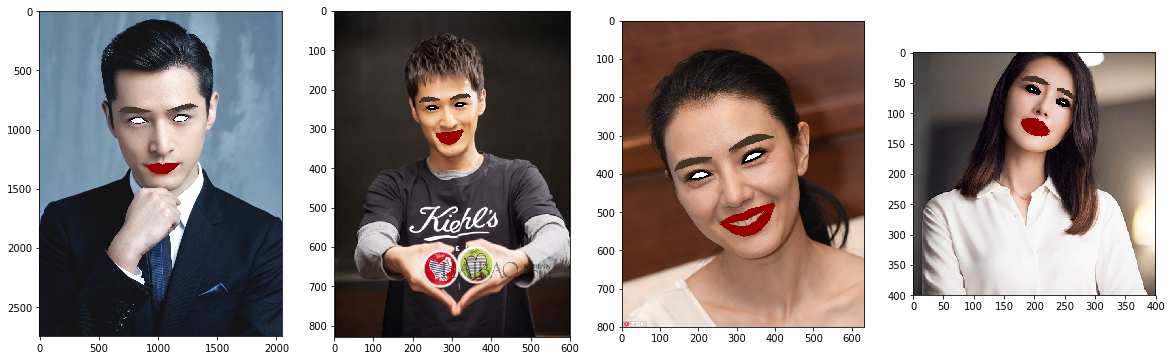

In [30]:
images = []
for img_file, img, location in zip(img_files, imgs, face_locations):
    image = Image.open(img_file)
    draw = ImageDraw.Draw(image)

    landmarks = face_recognition.face_landmarks(img)
    for landmark in landmarks:
        # 眉毛
        draw.polygon(landmark['left_eyebrow'], fill=(68, 54, 39, 128))
        draw.polygon(landmark['right_eyebrow'], fill=(68, 54, 39, 128))
        draw.line(landmark['left_eyebrow'], fill=(68, 54, 39, 150), width=5)
        draw.line(landmark['right_eyebrow'], fill=(68, 54, 39, 150), width=5)

        # 眼睛
        draw.polygon(landmark['left_eye'], fill=(255, 255, 255, 30))
        draw.polygon(landmark['right_eye'], fill=(255, 255, 255, 30))

        # 眼线
        draw.line(landmark['left_eye'] + [landmark['left_eye'][0]], fill=(0, 0, 0, 110), width=6)
        draw.line(landmark['right_eye'] + [landmark['right_eye'][0]], fill=(0, 0, 0, 110), width=6)

        # 嘴唇
        draw.polygon(landmark['top_lip'], fill=(150, 0, 0, 128))
        draw.polygon(landmark['bottom_lip'], fill=(150, 0, 0, 128))
        draw.line(landmark['top_lip'], fill=(150, 0, 0, 64), width=8)
        draw.line(landmark['bottom_lip'], fill=(150, 0, 0, 64), width=8)

    images.append(image)

show_images(images) 

## 人脸识别

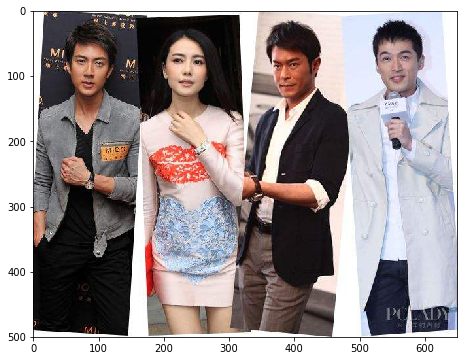

In [55]:
show_images([face_recognition.load_image_file(multiple_people)])

In [56]:
def read_face_library_encodings():
    """胡歌和高圆圆的人脸编码"""
    names = ['胡歌', '高圆圆']
    face_encodings = []
    
    img_hu_ge1 = face_recognition.load_image_file(hu_ge1)
    encodings = face_recognition.face_encodings(img_hu_ge1)
    face_encodings.append(encodings[0])
    
    img_gao_yuan_yuan1 = face_recognition.load_image_file(gao_yuan_yuan1)
    encodings = face_recognition.face_encodings(img_gao_yuan_yuan1)
    face_encodings.append(encodings[0])

    return names, face_encodings


img = face_recognition.load_image_file(multiple_people)
snapshot_face_encodings = face_recognition.face_encodings(img)

names, face_library_encodings = read_face_library_encodings()

for encoding in snapshot_face_encodings:
    face_check_result = face_recognition.compare_faces(face_library_encodings, encoding, 0.57)
    
    try:
        name = names[face_check_result.index(True)]
    except ValueError:
        name = '未知'

    print(name, end='\t')

高圆圆	未知	未知	胡歌	

## 人脸识别工程化问题
![](image/face_recognition_engineering.png)

## REST服务（适用于对外开放的服务）

### 安装Flask包

In [ ]:
! pip3 install flask
! pip3 install flask_restful

### 车牌识别服务

``` python
import tempfile
import logging
import werkzeug
import numpy as np

#import cv2

from hyperlpr import *
from PIL import Image

from flask import Flask
from flask_restful import reqparse, abort, Api, Resource


BASE_URL = '/license-plate-recognition/api/v1.0/'

app = Flask(__name__)

file_handler = logging.FileHandler('app.log')
app.logger.addHandler(file_handler)
app.logger.setLevel(logging.INFO)


class LicensePlateRecognition(Resource):
    def post(self):
        parse = reqparse.RequestParser()
        parse.add_argument('file', type=werkzeug.datastructures.FileStorage, location='files')
        args = parse.parse_args()

        img_file = args['file']

        if not img_file:
            return {'no file'}, 417

        with tempfile.NamedTemporaryFile() as file:
            img_data = img_file.read()
            file.write(img_data)
            
            image = Image.open(file)
            image = np.asarray(image)

            result = HyperLPR_PlateRecogntion(image)
            if not result:
                return {'no license plate'}, 417

            print(dir(img_file))
            app.logger.info('image: {} license plate recognition size {}'.format(img_file.filename, len(result)))

            res = []
            for item in result:
                det_obj = {}
                print(item[2])
                rect = item[2]
                det_obj['rectangle'] = {'x':rect[0], 'y':rect[1], 'w':rect[2]-rect[0], 'h':rect[3]-rect[1]}
                det_obj['object'] = item[0]
                det_obj['confidence'] = item[1]
                res.append(det_obj)
                
        return res, 201
        
        
if __name__ == '__main__':
    api = Api(app)
    api.add_resource(LicensePlateRecognition, BASE_URL + 'detect')
    app.run(host='0.0.0.0', debug=True)
```

### 调用服务

``` python
import os
import requests


API_URL = 'http://localhost:5000/license-plate-recognition/api/v1.0/'


def detect(filename):
    files = {'file': (filename, open(filename, 'rb'), 'image/png', {})}
    response = requests.post(API_URL + "detect", files=files)
    return response.json()

if __name__ == '__main__':
    json = detect('images/2.jpg')
    print('response json>\n', json)
```

## gRPC服务（适用于对内的服务）

### 安装gRPC和protoc

``` bash
sudo python3 -m pip install grpcio
sudo python3 -m pip install grpcio-tools
```

### 使用protocol buffer定义接口

``` python
syntax = "proto3";

//object detection
service ObjectDetection {
  //客户端到服务器端的流式RPC
  //对图像的数据进行对象检测
  rpc detect (stream UploadImageRequest) returns (DetectResponse) {}
}

//上传图像数据块
message UploadImageRequest {
  bytes data_block = 1;
}

//返回对象检测结果
message DetectResponse {
  repeated Object object = 1;
}

//对象的边框
message Rectangle {
  int32 x = 1;
  int32 y = 2;
  int32 w = 3;
  int32 h = 4;
}

//检测出的对象
message Object {
  string name = 1;
  float confidence = 2;
  Rectangle rectangle = 3;
}
```

### 生成gRPC代码

``` bash
python3 -m grpc_tools.protoc -I. --python_out=. --grpc_python_out=. object_detection.proto
```

## 服务容器化

### Python程序依赖的包放到requirements.txt
```
flask
flask_restful
requests
pillow
face_recognition
```

### 编写Dockerfile
```
FROM ubuntu
LABEL maintainer="wang-junjian@qq.com"

RUN apt-get update && apt-get install -y \
    python3 \
    python3-pip \
    nano \
    && rm -rf /var/lib/apt/lists/*

ADD requirements.txt /face-recognition/
WORKDIR /face-recognition
RUN pip3 install --no-cache-dir -r requirements.txt

RUN apt-get update && apt-get install -y \
    libsm6 \
    libxrender1 \
    libxext-dev \
    && rm -rf /var/lib/apt/lists/*

ADD *.py /face-recognition/

EXPOSE 5000

ENTRYPOINT ["python3", "app.py"]
```

### 构建镜像
```bash
sudo docker build -t face-recognition:latest .
```

### 运行服务
```bash
sudo docker run -it -p 5000:5000 face-recognition:latest
```